# Dataset

## kaggle - 'https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset/data

In [2]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.67.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using 

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Data Preprocessing

## Training Image Preprocessing

# Training Set

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


# Validation set

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
print('Hellow')

Hellow


# To avoid overshooting Loss Function

1.Choose small learning rate by default it is 0.001 but here we have taken 0.0001

2.there may be chance of underfitting so increase the number of neuron

3.Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

# Building Model

In [7]:
from tensorflow.keras.layers import Dense , Conv2D, MaxPool2D , Flatten, Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

Building Convolutional Layers

In [9]:
model.add(Conv2D(filters = 32,kernel_size = 3,padding = 'same',activation = 'relu',input_shape = [128,128,3]))
model.add(Conv2D(filters = 32,kernel_size = 3,activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

C:\Users\Preeti Kumari\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters = 64,kernel_size = 3,padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 64,kernel_size = 3,activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [11]:
model.add(Conv2D(filters = 128,kernel_size = 3,padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 128,kernel_size = 3,activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [12]:
model.add(Conv2D(filters = 256,kernel_size = 3,padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 256,kernel_size = 3,activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [13]:
model.add(Conv2D(filters = 512,kernel_size = 3,padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 512,kernel_size = 3,activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(Flatten()) #Flatten

Adding Dense Layer

In [16]:
model.add(Dense(units = 1500, activation = 'relu'))

In [17]:
model.add(Dropout(0.4))  #To avoid overfitting

Output Layer

In [18]:
model.add(Dense(units = 38 , activation = 'softmax'))

# Compiling the model

In [19]:
model.compile(tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [21]:
training_history = model.fit(x = training_set ,validation_data = validation_set , epochs = 10)

Epoch 1/10
   8/2197 ━━━━━━━━━━━━━━━━━━━━ 43:07 1s/step - accuracy: 0.0455 - loss: 3.9014

KeyboardInterrupt: 

In [22]:
print("Hellow")

Hellow


# Evaluating The Model

In [23]:
#Training Set Accuracy
train_loss, train_acc = model.evaluate(training_set)

  26/2197 ━━━━━━━━━━━━━━━━━━━━ 10:04 278ms/step - accuracy: 0.0598 - loss: 3.5832

KeyboardInterrupt: 

In [ ]:
print(train_loss , train_acc )

In [ ]:
#Model on validation set 
val_loss, val_acc = model.evaluate(validation_set)

In [ ]:
print(val_loss,val_acc)

## Loading the saved Model

In [1]:
from tensorflow.keras.models import load_model
model = load_model("trained_model.keras")

C:\Users\Preeti Kumari\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Saving the Model

In [ ]:
model.save("trained_model.h5")

In [ ]:
model.save("trained_model.keras")

In [ ]:
training_history.history

In [ ]:
#Recording history in json format
import json 
with open("training_history.json", "w") as f:
    json.dump(training_history.history,f)

In [2]:
training_history.history['accuracy']

NameError: name 'training_history' is not defined

In [ ]:
training_history.history['val_accuracy']

In [3]:
import json
with open("training_history.json", "r") as f:
    training_history = json.load(f)

# Check for accuracy key
print(training_history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [4]:
training_history['accuracy']

[0.6029589772224426,
 0.8541575074195862,
 0.9117575883865356,
 0.9404082894325256,
 0.9541788101196289,
 0.9643360376358032,
 0.9711217284202576,
 0.9768404364585876,
 0.9791450500488281,
 0.9821751117706299]

# Visualization

In [5]:
epochs = [i for i in range(1,11)]

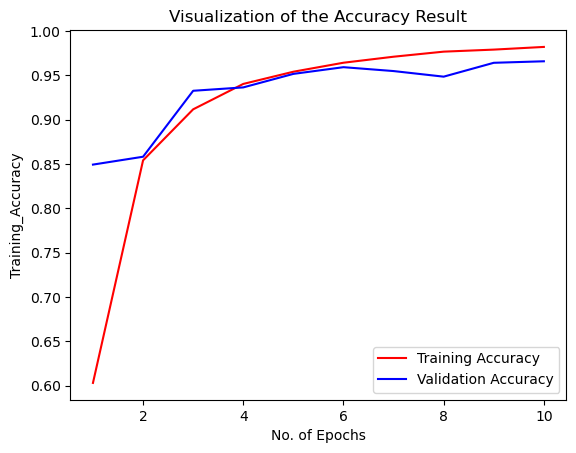

In [8]:
plt.plot(epochs ,training_history['accuracy'], color = 'red', label = 'Training Accuracy')
plt.plot(epochs ,training_history['val_accuracy'], color = 'blue', label = 'Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Training_Accuracy")
plt.title("Visualization of the Accuracy Result")
plt.legend()
plt.show()

## Some other metrics for model Evaluations

In [9]:
class_name = validation_set.class_names
class_name

NameError: name 'validation_set' is not defined

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [12]:
y_pred = model.predict(test_set)

NameError: name 'test_set' is not defined

In [29]:
y_pred.shape, y_pred

((17572, 38),
 array([[0.02771674, 0.0222359 , 0.0267583 , ..., 0.02133625, 0.02338506,
         0.01362362],
        [0.02718892, 0.0218144 , 0.02664296, ..., 0.02026898, 0.02814493,
         0.0132246 ],
        [0.0263745 , 0.02229627, 0.02638275, ..., 0.01996692, 0.02539313,
         0.01333876],
        ...,
        [0.02674519, 0.02167869, 0.02863086, ..., 0.02237794, 0.02559558,
         0.01493129],
        [0.02703552, 0.02209531, 0.02813306, ..., 0.02260352, 0.02460699,
         0.01500849],
        [0.02457625, 0.01802525, 0.02715605, ..., 0.02305791, 0.02454304,
         0.01085171]], dtype=float32))

In [38]:
predicted_categories = tf.argmax(y_pred, axis = 1)

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([19,  8, 19, ..., 19, 19,  8], dtype=int64)>

In [40]:
true_categories = tf.concat([y for x , y in test_set],axis = 0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [41]:
Y_true = tf.argmax(true_categories, axis = 1)

In [42]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(classification_report(Y_true,predicted_categories,target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       504
                                 Apple___Black_rot       0.00      0.00      0.00       497
                          Apple___Cedar_apple_rust       0.00      0.00      0.00       440
                                   Apple___healthy       0.00      0.00      0.00       502
                               Blueberry___healthy       0.00      0.00      0.00       454
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       421
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       410
                       Corn_(maize)___Common_rust_       0.03      0.92      0.06       477
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

C:\Users\Preeti Kumari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Preeti Kumari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Preeti Kumari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape, cm

NameError: name 'confusion_matrix' is not defined

# Confusion Matrix Visualization

In [10]:
plt.figure(figsize =(40,40))
sns.heatmap(cm, annot = True,annot_kws={'size':10})
plt.xlabel("Predicted Class", fontsize = 35)
plt.ylabel("Actual Class", fontsize = 35)
plt.title("Plant Disease Confusion Matrix Visualization", fontsize = 50)
plt.show()

NameError: name 'cm' is not defined

<Figure size 4000x4000 with 0 Axes>